### Machine Learning Prediction Models for Recurrence Risk Prediction in Thyroid Cancer Patients

### OBJECTIVES
- Train machine learning models to predict the likelihood of thyroid cancer recurrence using clinical and pathological data. 
- Predict recurrence risk in thyroid cancer patients to help tailor follow-up care
- Optimize follow-up by aiding in determining personalized follow-up intervals and treatment intensities for patients, ensuring resources are efficiently allocated based on individual recurrence risk.
- Evaluate Model Performance: Implement and analyze model performance using metrics relevant to healthcare, such as AUC-ROC, precision, and recall, to ensure predictions are both accurate and clinically interpretable
-  Develop a Streamlit-based web application that enables clinical users to predict recurrence risk, enhancing decision-making processes and allowing healthcare providers to utilize the model in real-time for new patient data

### OUTCOMES
- Reliable Recurrence Prediction: A validated machine learning model capable of stratifying patients into high or low recurrence risk categories, with clinical interpretations available for healthcare use.
- Clinically Interpretable Results: A model that demonstrates transparent and interpretable results, with key feature contributions identified to support clinicians in understanding factors influencing recurrence risk.
- Streamlined Workflow Tool: A functional and intuitive web interface for clinicians to input patient data and obtain recurrence risk probabilities, displayed in a format suited to healthcare analytics standards)

### STEP TWO: Define your Performance Metrics 
- *Accuracy*: Proportion of correct predictions.
- *Precision*: Proportion of true positives among predicted positives
- *Recall (Sensitivity*): Proportion of actual positives correctly identified (Sensitivity)
- *F1 Score*: Harmonic mean of Precision and Recall
- *-ROC*: The area under the ROC curve, measures the model's ability to discriminate between classes

### STEP THREE: DATA CLEANING
- Load database
- Identify the number of roles, columns, data type
- Identify any unique, missing, null, and duplicated values
- Apply Imputation to Data: Ensure consistent transformation on both training and test sets.
- Reindex Test Data: Ensure test datasets have the same columns as the training sets by reindexing and filling missing columns with 0.
- Encode categorized data

In [5]:
# Load the dataset

In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv("Thyroid_Diff.csv")

In [66]:
# Display the first few rows and columns
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [67]:
# Identify columns
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [68]:
# Identify Total number of rows and features
df.shape

(383, 17)

In [69]:
# Identify Data types
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiotherapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [70]:
# Identify Missing values in the dataset
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiotherapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [71]:
# Identify the unique values in each column
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiotherapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [72]:
# Count all duplicated rows
count_duplicated = df.duplicated().sum()
count_duplicated

19

In [12]:
# Identify these duplicated rows in the dataset
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
120,37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


In [73]:
# To avoid errors, remove all duplicated rows
remove_duplicate = df.drop_duplicates()
remove_duplicate

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [74]:
# call new database without duplicates 
df = df.drop_duplicates()
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [75]:
#reset rows index
df.reset_index(drop=True, inplace=True)
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
360,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
361,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
362,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Encode all your categorial features if they are in the data.

In [76]:
# Change objects with two unique values to numerice values (0 or 1) 
df["Gender"] = df["Gender"].map({'M':1, 'F':0})
df["Smoking"] = df["Smoking"].map({'Yes':1, 'No':0})
df["Hx Smoking"] = df["Hx Smoking"].map({'Yes':1, 'No':0})
df["Hx Radiotherapy"] = df["Hx Radiotherapy"].map({'Yes':1, 'No':0})
df["Recurred"] = df["Recurred"].map({'Yes':1, 'No':0})

df

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,1
360,81,1,1,0,1,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1
361,72,1,1,1,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1
362,61,1,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,1


In [77]:
# Converting categorical columns to dummies (one-hot encoding)
df_dummies = pd.get_dummies(df, columns=['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'])

In [78]:
df_dummies

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1,34,0,0,1,0,0,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2,30,0,0,0,0,0,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
3,62,0,0,0,0,0,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,62,0,0,0,0,0,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,1,False,False,True,False,...,True,False,False,False,False,True,True,False,False,False
360,81,1,1,0,1,1,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
361,72,1,1,1,0,1,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
362,61,1,1,1,1,1,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [79]:
# Convert all boolean values (True/False) to integers (1/0)
bool_cols = df_dummies.select_dtypes(include='bool').columns
df_dummies[bool_cols] = df_dummies[bool_cols].astype(int)

In [80]:
df_dummies

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,30,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
360,81,1,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
361,72,1,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
362,61,1,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [81]:
df = df_dummies
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,30,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
360,81,1,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
361,72,1,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
362,61,1,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [82]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Recurred',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a',
       'T_T3b', 'T_T4

# Splitting my data for test and train

In [30]:
# Import library for splitting data
from sklearn.model_selection import train_test_split

In [83]:
# Defined my features and target variables('Recurred')
X = df.drop('Recurred', axis=1) 
y = df['Recurred']

In [84]:
X

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,30,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,62,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,1,1,1,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
360,81,1,1,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
361,72,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
362,61,1,1,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [85]:
y

0      0
1      0
2      0
3      0
4      0
      ..
359    1
360    1
361    1
362    1
363    1
Name: Recurred, Length: 364, dtype: int64

In [86]:
# 👉 This line splits our dataset into four parts:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# X_train and y_train → used to train the model
# X_test and y_test → used to test how well the model performs on unseen data
#
# - X = all the input features (the columns we use to make predictions)
# - y = the target variable (the column we want to predict)
#
# test_size=0.2 means 20% of the data will be set aside for testing,
# and 80% will be used for training.
#
# random_state=123 simply ensures that the split is done the same way every time we run the code,
# so we get consistent results (useful for reproducibility).
#
# In short:
# This line helps us prepare data for training and testing the model fairly.


In [87]:
print("Training set shape:", X_train.shape, y_train.shape) 
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (291, 51) (291,)
Testing set shape: (73, 51) (73,)


In [88]:
X_train

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
228,27,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
142,24,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
333,21,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
147,24,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
337,54,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,31,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
17,44,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
230,46,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
98,33,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [89]:
y_train

228    0
142    0
333    1
147    0
337    1
      ..
83     1
17     0
230    0
98     0
322    1
Name: Recurred, Length: 291, dtype: int64

In [90]:
X_test

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
167,45,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
170,30,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11,59,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
309,34,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
41,38,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,45,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
249,32,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
316,29,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
258,41,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [91]:
y_test

167    0
170    0
11     0
309    1
41     0
      ..
162    0
249    0
316    1
258    0
79     0
Name: Recurred, Length: 73, dtype: int64

# Exploratory Data Analysis, Visualization and Explanations

### Explanation Exploratory Data Analysis (EDA) Plan:

a. Summary Statistics: Generate basic statistics (mean, median, min, max) for numeric features like Age to understand their distribution.

b. Descriptive statistics for numerical and categorical features

c. Distribution of Target Variable: Plot the distribution of the target variable Recurred to assess class imbalance.

d. Visualize Categorical Features: Use bar charts to show the distribution of categorical variables, such as Gender, Smoking, Thyroid Function, and others, to understand the diversity in these features.

f. Relationships Between Features: 
Pearson Correlation Heatmap: Visualize correlations between numerical features to identify possible multicollinearity or linear relationships. 
Boxplots and Violinplots: Use boxplots for numerical features like Age against the target variable (Recurred) to check if there’s a visible relationship.

g. Feature Relationships and Insights: Identify key patterns or trends in the data that may influence recurrence. Document the implications for feature selection or model building.


In [92]:
print("Summary statistics for Age:")
print(df['Age'].describe())

Summary statistics for Age:
count    364.00000
mean      41.25000
std       15.31436
min       15.00000
25%       30.00000
50%       38.00000
75%       52.00000
max       82.00000
Name: Age, dtype: float64


### Interpretation of the Summary Statistics for Age:
Here is the breakdown of the key summary statistics for the `Age` column in your dataset:
1. Count: `364 - This indicates that there are 364 entries (data points) for the `Age` column.
2. Mean (Average Age): 41.25`The mean age of the individuals in this dataset is approximately 41.25 years. This provides the central tendency of the data.
3. Standard Deviation (std): 15.31`- The standard deviation of 15.31 suggests a relatively wide spread of ages around the mean. A larger standard deviation means that there are individuals in the dataset whose ages are significantly different from the mean.
4. Minimum (min): `15.00`- The youngest individual in the dataset is 15 years old. This could represent a specific age range for this particular dataset.
5. 25th Percentile (25%): `30.00`- This means that 25% of the individuals in the dataset are 30 years old or younger. The 25th percentile, or lower quartile, gives insight into the younger portion of the population.
6. Median (50%): `38.00`- The median age is 38 years, which means that half of the individuals in the dataset are younger than 38, and half are older. The median provides a better central tendency measure in cases where there are outliers (extremely young or old individuals).
7. 75th Percentile (75%): `52.00`- 75% of individuals are 52 years old or younger. This helps show the distribution of ages across the higher end.
8. Maximum (max): `82.00`- The oldest individual in the dataset is 82 years old.
### Key Takeaways:
- The dataset appears to have a fairly broad range of ages, from 15 to 82 years.
- The average age is around 41.25 years, with a large portion of the dataset lying between 30 and 52 years old (as seen from the 25th, 50th, and 75th percentiles).
- The standard deviation (15.31) shows variability in age distribution, with people spread across a relatively wide range.

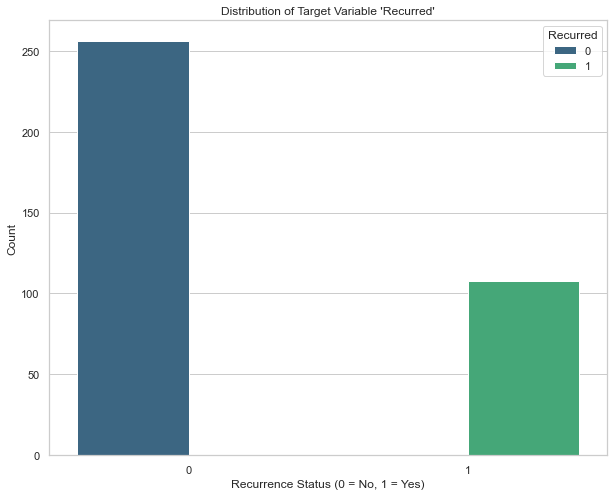

In [93]:
# Distribution of Target Variable (Recurred)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")

# Distribution of Target Variable
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Recurred', hue='Recurred', palette='viridis') 
plt.title("Distribution of Target Variable 'Recurred'")
plt.xlabel("Recurrence Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Recurred")
plt.show()

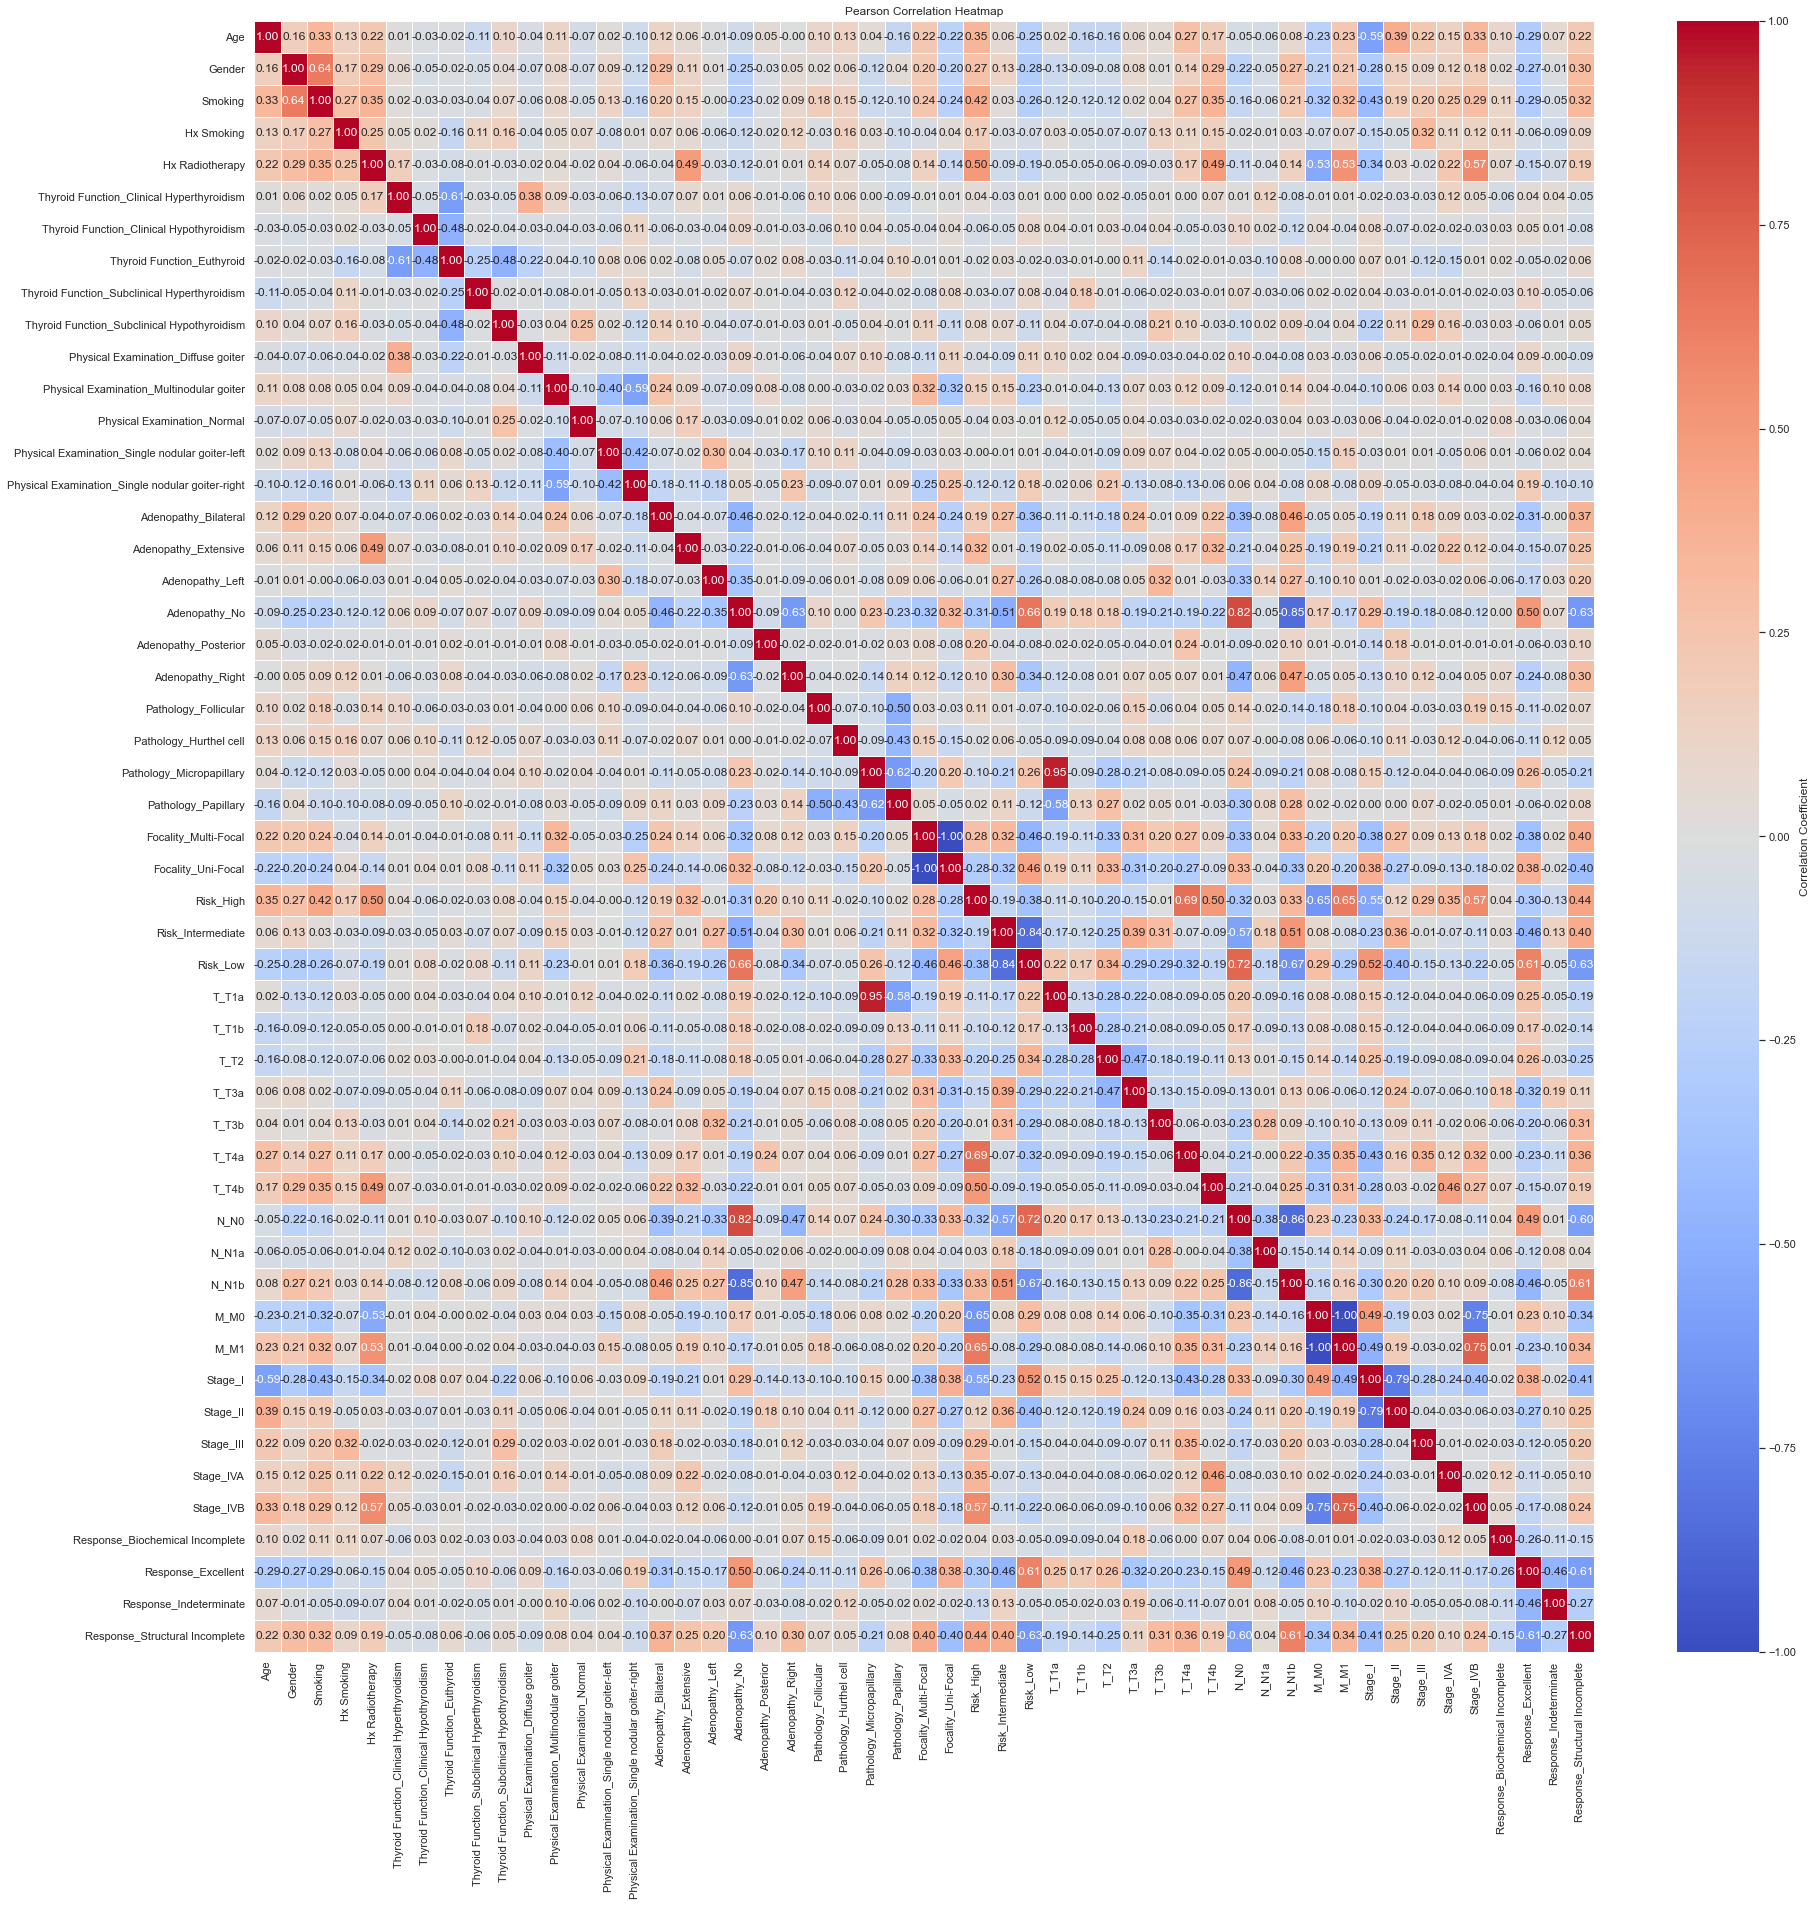

In [94]:
# Correlation of the Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Calculate the correlation matrix
correlation_matrix = X_train.corr(method='pearson')

# Step 2: Plot the heatmap using Seaborn
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

# Step 3: Display the plot
plt.title("Pearson Correlation Heatmap")
plt.show()

### Interpretation of Correlation of the Dataset
- The heatmap displays correlations between various features in the dataset, with several features showing a significant correlation (values close to 1 or -1), while others are less correlated.
- Strong correlations are evident between some pairs of features:
- A significant relationship between Age, smoking, History of radiotherapy, and recurrence of thyroid cancer
- A significant relationship between Thyroid cancer recurrence and Adenopathy, pathology, High Risk, and TNM cancer stagings.
- Thyroid function types have little to no relationship with age and physical examination

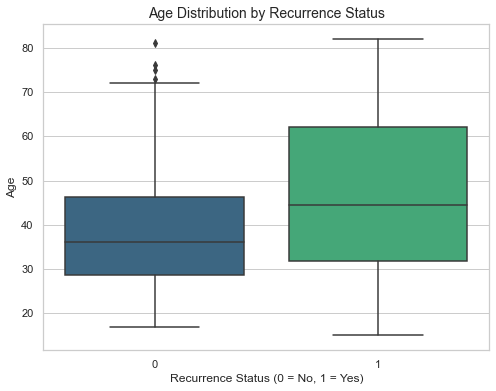

In [95]:
# Box Plot of Age vs. Recurrence Status

import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Draw the box plot
sns.boxplot(data=df, x='Recurred', y='Age', palette='viridis')

# Add title and axis labels
plt.title("Age Distribution by Recurrence Status", fontsize=14)
plt.xlabel("Recurrence Status (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.show()

### Interpretation of Boxplot
- No Recurrence (0): The age range for patients without recurrence is between 20 and 80 years, with a median age around 38. This group appears to have a lower spread of age, with most values clustered around 30 to 40 years.

- Recurrence (1): The age range for patients with recurrence is also between 20 and 80 years, but the spread seems wider, indicating more variation in age among patients who experience recurrence. The median age for this group is slightly higher than the "No Recurrence" group, suggesting that older individuals may be more likely to experience recurrence.

# Data Balancing/Resampling

In [ ]:
# SMOTE - Synthetic oversampling Technique
# - To balance class distribution, improve model performance, prevent overfitting, and enhance generalization.

In [96]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")

After SMOTE:
X_resampled shape: (404, 51)
y_resampled shape: (404,)


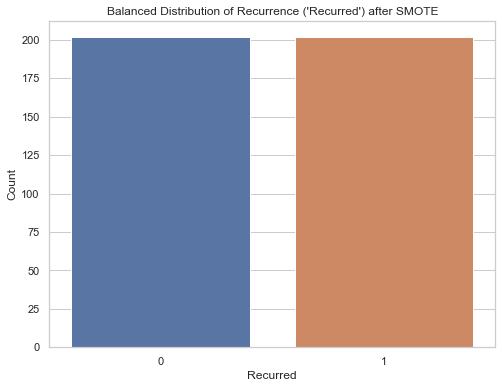

In [98]:
# Visualize the new balanced distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title("Balanced Distribution of Recurrence ('Recurred') after SMOTE")
plt.xlabel("Recurred")
plt.ylabel("Count")
plt.show()

# Feature Selection 

In [99]:
# Based on domain knowledge and clinical knowledge, the selected features are: ]

selected_features = [
    'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 
    'T', 'N', 'M', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB', 
    'Thyroid Function_Euthyroid', 'Pathology_Papillary', 'Risk_Low', 'Focality_Uni-Focal'
]

# Selected Model Training

#### Select appropriate algorithms: Random Forest, Logistic Regression, KNN and XGBoost

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the model
Rmodel = RandomForestClassifier(random_state=42)

# Training the model
Rmodel.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

# Evaluating the Model

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Accuracy _score to evaluate the performance of the model (total number of correct predictions to total predictions)
# Precision_score - ratio of correctly predicted positive instances to the total predicted positives
# Recall_score - ratio of correctly predicted positive instances to the total actual positives
# F1_score - harmonic mean of precision and recall
# roc_auc_score - evaluates the model's performance across various threshold levels, giving a more holistic view of its ability to distinguish between classes


# Making predictions
y_pred = Rmodel.predict(X_test)

In [102]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [103]:
y_test

167    0
170    0
11     0
309    1
41     0
      ..
162    0
249    0
316    1
258    0
79     0
Name: Recurred, Length: 73, dtype: int64

In [104]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.99
Precision: 1.00
Recall: 0.95
F1 Score: 0.97
ROC AUC Score: 0.97


In [ ]:
# USing Grid Search hyperparameters to fine-tune the Model to improve performance

In [105]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and their values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initializing the grid search
grid_search = GridSearchCV(Rmodel, param_grid, cv=5, scoring='accuracy')

# Performing the grid search
grid_search.fit(X_resampled, y_resampled)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score:.2f}')

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.97


In [106]:
best_params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [107]:
# Create the model with best parameters
Rfmodel = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Train the model again on your full (or balanced) training data
Rfmodel.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [108]:
# Predictions on the test data
y_pred = Rfmodel.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9863013698630136

Confusion Matrix:
 [[54  0]
 [ 1 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.95      0.97        19

    accuracy                           0.99        73
   macro avg       0.99      0.97      0.98        73
weighted avg       0.99      0.99      0.99        73



# Cross-Validating Model to ensure its robustness and generalizability

In [110]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(Rfmodel, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Display the individual scores and their average
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean().round(3))
print("Standard deviation:", cv_scores.std().round(3))

Cross-validation scores: [0.92592593 0.95061728 0.97530864 0.98765432 0.9875    ]
Average accuracy: 0.965
Standard deviation: 0.024


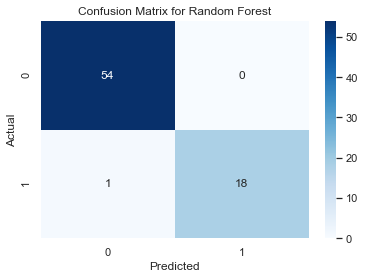

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Intepretation of Random Forest Confusion Matrix
*True Positives (TP)*: 20 instances where the model correctly predicted recurrence (1) as recurrence. This is the ideal scenario, where the model is accurately identifying patients who are at risk of recurrence.
*False Positives (FP)*: 3 instances where the model incorrectly predicted recurrence (1) for patients who did not have recurrence. This means the model is over-predicting recurrence for some patients.
*False Negatives (FN)*: 2 instances where the model incorrectly predicted no recurrence (0) for patients who actually had a recurrence. These are cases where the model failed to identify patients who are at risk of recurrence, which is undesirable in a clinical setting.
*True Negatives (TN)*: 48 instances where the model correctly predicted no recurrence (0) for patients without recurrence.

*Conclusion*:
The model has a high number of True Positives (TP = 20) and True Negatives (TN = 48), indicating that it is good at identifying both positive and negative cases.
The False Positives (FP = 3) and False Negatives (FN = 2) are relatively low, indicating a fairly low error rate, but the model could be further improved to reduce the risk of false negatives (missed recurrences).

# Plot the AUC-ROUC curve

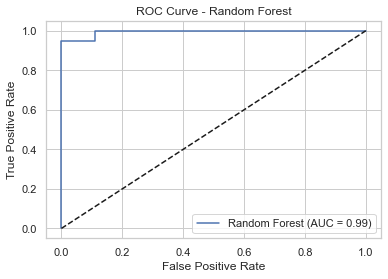

In [113]:
from sklearn.metrics import roc_curve, auc

# Re-do predictions to get predicted probabilities
y_pred_proba_rf = Rfmodel.predict_proba(X_test)[:, 1]

# Evaluate the model (e.g., using AUC-ROC)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Plotting the AUC-ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='best')
plt.show()

#### Interpretation
AUC-ROC Curve:
- AUC Score: The AUC value of 0.99 indicates that the Random Forest model performs excellently at distinguishing between the two classes: recurrence (1) and no recurrence (0). A value of 0.99 suggests that the model has an almost perfect ability to discriminate between patients who have recurrence and those who do not.
- ROC Curve Shape: The curve shows a steep rise towards the top-left corner, confirming that the model is effective at minimizing false positives while correctly classifying true positives. The curve is far from the diagonal dashed line (which represents a random classifier), emphasizing strong performance.
Conclusion: The model's AUC-ROC value of 0.99 indicates excellent performance and strong predictive capability for recurrence risk. This model would likely perform well in clinical settings for predicting the recurrence of thyroid cancer.

# Logistic Regression

Confusion Matrix for Logistic Regression:
[[54  0]
 [ 1 18]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.95      0.97        19

    accuracy                           0.99        73
   macro avg       0.99      0.97      0.98        73
weighted avg       0.99      0.99      0.99        73

Logistic Regression Metrics:
Accuracy: 0.99
Precision: 1.00
Recall: 0.95
F1 Score: 0.97


ROC-AUC for Logistic Regression: 0.9736842105263157


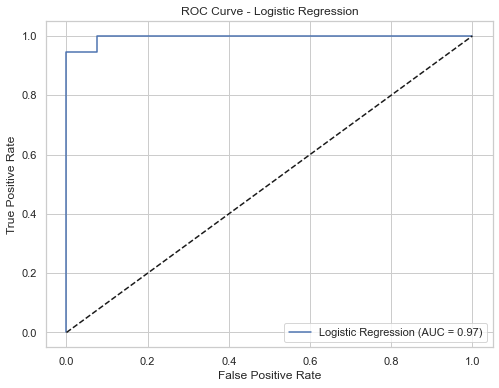

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg):.2f}")
print("\n")

# Calculate ROC-AUC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print(f"ROC-AUC for Logistic Regression: {roc_auc_log_reg}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Interpretation fo ROC Curve
AUC Value: 0.97
- The Area Under the Curve (AUC) of 0.97 indicates a high classification performance of the Logistic Regression model. This means the model is very good at distinguishing between the two classes (Recurrence: Yes or No), with a true positive rate significantly higher than the false positive rate across the range of thresholds.
- ROC Curve: The curve is well above the diagonal line, showing that the model is performing much better than random guessing.

In [119]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.95      0.97        19

    accuracy                           0.99        73
   macro avg       0.99      0.97      0.98        73
weighted avg       0.99      0.99      0.99        73



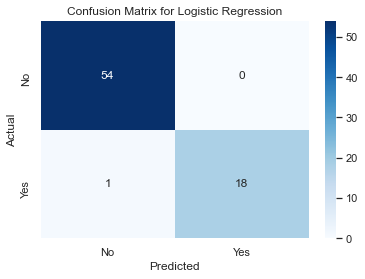

In [120]:
# Plot the confusion matrix for target prediction
y_pred_log_reg = log_reg_model.predict(X_test)

# Compute the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###### Interpretation
- True Negatives (TN): Predicted No Recurrence and the patient had no recurrence.
- False Positives (FP): Predicted Recurrence, but the patient had no recurrence.
- False Negatives (FN): Predicted No Recurrence, but the patient had recurrence.
- True Positives (TP): Predicted Recurrence and the patient had recurrence.
- Accuracy: High accuracy is observed, as most of the predictions are correct (both TP and TN).
- False Positive Rate: The false positive rate (FPR) is quite low, indicating the model does not frequently misclassify non-recurrence as recurrence.
- False Negative Rate: The false negative rate (FNR) is relatively low as well, with only 1 instance where recurrence was missed.

# K-Nearest Neighbors (KNN)

Confusion Matrix for KNN:
[[45  9]
 [ 4 15]]
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        54
           1       0.62      0.79      0.70        19

    accuracy                           0.82        73
   macro avg       0.77      0.81      0.79        73
weighted avg       0.84      0.82      0.83        73

KNN Metrics:
Accuracy: 0.82
Precision: 0.62
Recall: 0.79
F1 Score: 0.70


ROC-AUC for KNN: 0.8114035087719298


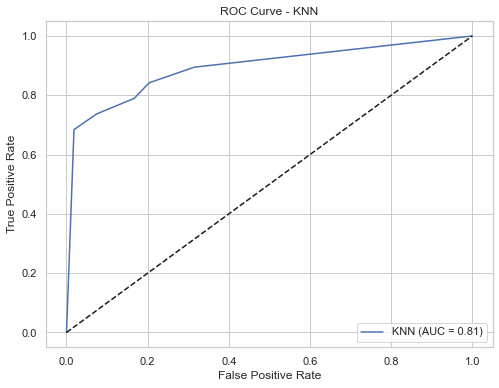

In [121]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# KNN Metrics
print("KNN Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.2f}")
print("\n")

# Calculate ROC-AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print(f"ROC-AUC for KNN: {roc_auc_knn}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

##### Interpretation of KNN AUC-ROC Curve:
AUC Score: 0.81: The ROC curve for KNN shows a strong performance with an AUC of 0.81. This means the KNN model has a good ability to distinguish between the classes (Recurred vs. No Recurrence). The closer the AUC score is to 1, the better the model is at making predictions.
Curve Shape: The curve is relatively steep, indicating that the model quickly achieves a high true positive rate as the false positive rate increases, which is ideal.

In [122]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        54
           1       0.62      0.79      0.70        19

    accuracy                           0.82        73
   macro avg       0.77      0.81      0.79        73
weighted avg       0.84      0.82      0.83        73



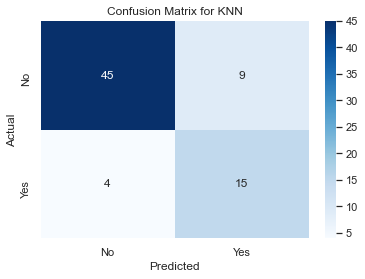

In [123]:
# Confusion Matrix
y_pred_knn = knn_model.predict(X_test)

# Compute the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###### Interpretation of KNN Confusion Matrix:
- True Negatives (TN): 45 (Correctly predicted "No Recurrence")
- False Positives (FP): 9 (Incorrectly predicted "Recurred" when it was "No Recurrence")
- False Negatives (FN): 4 (Incorrectly predicted "No Recurrence" when it was "Recurred")
- True Positives (TP): 15 (Correctly predicted "Recurred")
- Accuracy: The model correctly predicted 64 out of 73 recurrence cases, giving it a decent overall accuracy.
Error Analysis: The model is performing reasonably well but has a slightly higher number of false negatives compared to false positives, indicating that it might miss some of the recurrence cases.

# XGBoost

XGBoost Metrics:
Accuracy: 0.99
Precision: 1.00
Recall: 0.95
F1 Score: 0.97


Confusion Matrix for XGBoost:
[[54  0]
 [ 1 18]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.95      0.97        19

    accuracy                           0.99        73
   macro avg       0.99      0.97      0.98        73
weighted avg       0.99      0.99      0.99        73

ROC-AUC for XGBoost: 0.9736842105263157


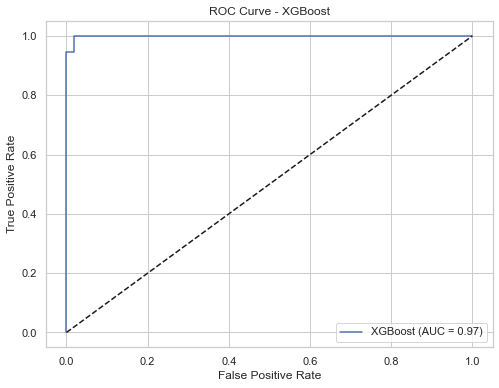

In [124]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pickle

# Initialize and train the XGBoost model without the deprecated 'use_label_encoder' parameter
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Make predictions on the resampled test set
y_pred_xgb = xgb_model.predict(X_test)

# XGBoost Metrics
print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.2f}")
print("\n")

# Evaluate the model
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Calculate ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC-AUC for XGBoost: {roc_auc_xgb}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

#### Inteepretation of AUC-ROC Curve:
AUC = 0.97: This indicates that the XGBoost model has a high ability to differentiate between the two classes (Recurrence vs. No Recurrence). The curve shows the true positive rate (sensitivity) increasing as the false positive rate (1 - specificity) decreases, indicating a strong model performance.
Sharp curve: The ROC curve remains close to the top-left corner, suggesting that the model performs well in distinguishing between classes, with fewer false positives and false negatives

In [125]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.95      0.97        19

    accuracy                           0.99        73
   macro avg       0.99      0.97      0.98        73
weighted avg       0.99      0.99      0.99        73



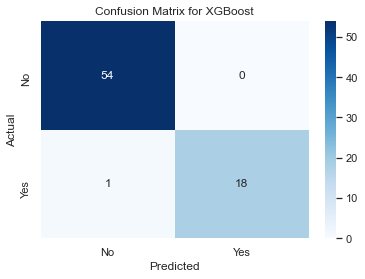

In [126]:
# Confusion Matrix
y_pred_xgb = xgb_model.predict(X_test)

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Intrepatation Confusion Matrix:

- True Positives (TP = 18): The model correctly predicted 20 instances of recurrence (Yes).
- True Negatives (TN = 54): The model correctly predicted 49 instances of no recurrence (No).
- False Negatives (FN = 1): The model incorrectly predicted 1 instance as no recurrence when they were actually recurrence.
This confusion matrix indicates that the XGBoost model performs well, with a small number of false positives and false negatives. The false negatives are particularly low, which is critical for clinical applications where missing a positive case (recurrence) can have serious consequences. The accuracy of the model is high, with a low error rate.

# Deploy your trained model as a Web Application (Clinical prototype for end-user)

In [127]:
import pickle

# Assuming 'xgb_model' is the trained XGBoost model for diagnosis
model_filename = 'xgb_model.pkl'

# Save the trained XGBoost model
with open(model_filename, "wb") as f:
    pickle.dump(xgb_model, f)
    
print(f"Model saved as {model_filename}")

Model saved as xgb_model.pkl


In [131]:
with open("x_train_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)